# Stimuli

Electrical stimulation is completely described using electrodes that can deliver *stimuli*, which is the object of present chapter.

Electrical stimuli are electrical signals, mostly current quantities, that are applied in the extracellular (marginaly to the intracellular) to trigger cell reactions. In NRV, a special class has been designed to handle stimuli.

A stimulus is described as an asynchronous signal: there is no need for a regular clock to describe the stimulus changes in time. As a consequence, the stimulus is based on two lists:
- a first list called 's' contains the signal values,
- a second list called 't' contains the time stamps for the different values.

The class constructor takes no positional arguments, however there is one optional argument:
- s_init: the initial value of the stimulus at time t=0.

At the instantiation, a stimulus only gets its initial value at time t=0, and lists 's' and 't' have a length of 1. Here is a minimal example of instatiation of a stimulus:


In [1]:
import nrv

stim1 = nrv.stimulus()
print(len(stim1.s))
print(len(stim1.t))

1
1


It is possible to plot the stimulus instance using the plot method, taking as arguments, matplotlib axes. An example is performed with more consistant stiuli bellow in this chapter.

## Stimuli generators
In order to ease the user experience, commonly used signals can be automatically generated by invoking pre-implemented methods:
- 'constant': a simple constant signal. Parameters are:
  - value (float): Value of the constant signal
  - start (float): starting time of the constant signal, by default set to 0
- 'pulse': pulse shape signal samples. Parameters are:
  - value (float): value of the pulse
  - start (float): starting time of the pulse
  - duration (float): duration of the pulse, optional and by default equal to zero, if non zero value, a point is added at the end of the pulse with the previous value
- 'biphasic_pulse': conventional automatically charged-balanced biphasic pulse waveform. Parameters are:
  - start (float): starting time of the waveform, in ms
  - s_cathod (float): cathodic (negative stimulation value) current, in uA WARNING: always positive, the user give here the absolute value
  - t_stim (float): stimulation time, in ms
  - s_anod (float): anodic (positive stimulation value) current and, in uA
  - t_inter (float): inter pulse timing, in ms
  - anod_first (bool): if true, stimulation is anodic and begins with the anodic value and is balanced with cathodic value, else stimuation is cathodic and begins with the cathodic value and is balances with anodic value, by default set to False (cathodic first as most stimulation protocols)
- 'sinus': sinusoidal waveform. Parameters are:
  - start (float): starting time of the waveform, in ms
  - duration float duration of the waveform, in ms
  - amplitude (float): amplitude of the waveform, in uA
  - freq (float): frequency of the waveform, in kHz
  - offset (float): offset current of the waveform, in uA, by default set to 0
  - phase (float): initial phase of the waveform, in rad, by default set to 0
  - dt (float): sampling time period to generate the sinusoidal shape. If equal to 0, dt is automatically set to match 100 samples per sinusoid period by default set to 0
- 'harmonic_pulse': pulse waveform based on N harmonic. Parameters are:
  - start (float): starting time of the waveform, in ms
  - t_pulse (float): pulse duration, in ms
  - amplitude (float): final amplitude of the pulse, in uA WARNING: always positive, the user give here the absolute value
  - amp_list (list): list of relative sine amplitude, between 0 and 1
  - phase_list (list): list of sine pulse phases
  - dt (float): sampling time period to generate the sinusoidal shape. If equal to 0, dt is automatically set to match 100 samples per sinusoid period by default set to 0
- 'square': repetitive (periodic) square waveform. Parameters are:
  - start (float): starting time of the waveform, in ms
  - duration (float): duration of the waveform, in ms
  - amplitude (float): amplitude of the waveform, in uA
  - freq (float): frequency of the waveform, in kHz
  - offset (float): offset current of the waveform, in uA, by default set to 0
  - dt (float): sampling time period to generate the sinusoidal shape. If equal to 0, dt is automatically set to match 100 samples per sinusoid period by default set to 0
- 'ramp': ramp waveform with slope value. Parameters are:
  - slope (float): slope of the waveform, in uA.ms-1
  - start (float): starting time of the waveform, in ms
  - duration (float): duration of the waveform, in ms
  - dt (float): sampling time period to generate the sinusoidal shape
  - bounds (tuple): boundary vaues of the ramp signal
  - printslope (bool, optional): if True, the value of the slope is printed on the prompt
- 'ramp_lim': ramp waveform with bounds values. Parameters are:
  - ampstart (float): initiale amplitude of the waveform, in uA
  - ampmax (float): final amplitude of the waveform, in uA
  - tstart (float): starting time of the waveform, in ms
  - tmax (float): starting time of the waveform, in ms
  - duration (float): duration of the waveform, in ms
  - dt (float): sampling time period to generate the sinusoidal shape
  - printslope (bool, optional): if True, the value of the slope is printed on the prompt


As an example, let's create a biphasic signal ($50\mu s$ of cathodic time, cathodic value of 1, $40\mu s$ deadtime between cathodic and anodic and a ratio of 5 betwen cathodic and anodic values) and a sinusoidal signal at $1kHz$ and of amplitude 0.5

Text(0.5, 1.0, 'Biphasic stimulus')

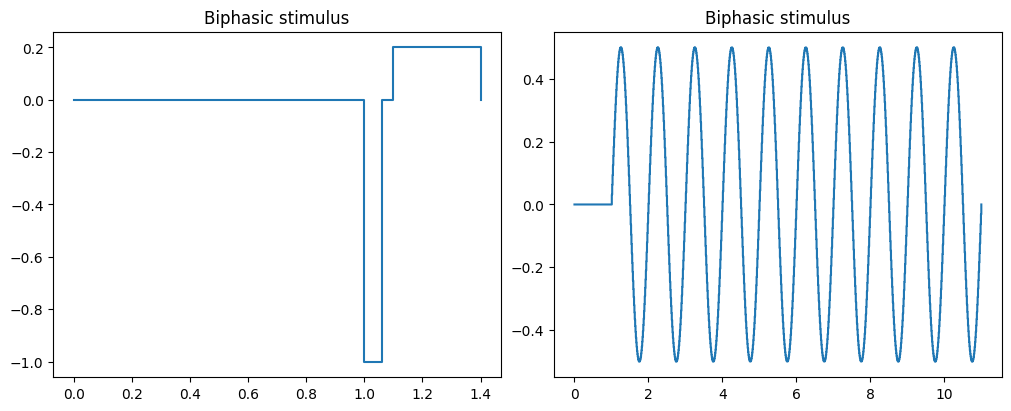

In [2]:
import matplotlib.pyplot as plt

t_start = 1
V_cat = 1
t_cat = 60e-3   # recall, NRV's units are in ms
t_dead = 40e-3
ca_ratio = 5

biphasic_stim = nrv.stimulus()
biphasic_stim.biphasic_pulse(t_start, V_cat,t_cat, V_cat/ca_ratio, t_dead)

f_stim = 1      # recall, NRV's units are in ms
duration = 10
amp = 0.5

sinus_stim = nrv.stimulus()
sinus_stim.sinus(t_start, duration, amp, f_stim)


#print(dir(biphasic_stim))
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 4))
biphasic_stim.plot(axs[0])
axs[0].set_title('Biphasic stimulus')
sinus_stim.plot(axs[1])
axs[1].set_title('Biphasic stimulus')


## Mathematical operations with stimuli

The asynchronous description of stimulus is convinient for pulsed signal such as used on electrodes, and is also interesting for handling simulations: 'simulate' methods are paused and stimulation is updated thanks to the time stamps of the involved stimuli.

However, it can be seen also as restricting operations with stimuli. In order to limit such restrictions, basic mathematical operations between stimuli objects have been implemented:
- +,-,* operators are implemented with numerical values or between to stimulus objects. The end used do not have to worry about time stamps combinations. It is worth mentioning that the division has not been implemented as this operation is ambiguous and can lead to divisions by zero. For dividing by a scalar value, we envourage to multiply by the inverse of the scalar.
- absolute ('abs') and negation of a stimulus are implemented.
- a length method is implemented
- (in-)equality comparaison operators are implemented, if stimuli are equal but not of the same length (successive equal values with multiple time stamps), the the result is still straigthforward, but compared stimuli are not altered (redondancy of values is not removed)
- <, > operators **are not implemented** as the are ambiguous.

Here below is an example of constant sinusoidal stimulation with envelope modulation by a ramp signal, to demonstrate the use of operations:

Text(0.5, 1.0, 'product result')

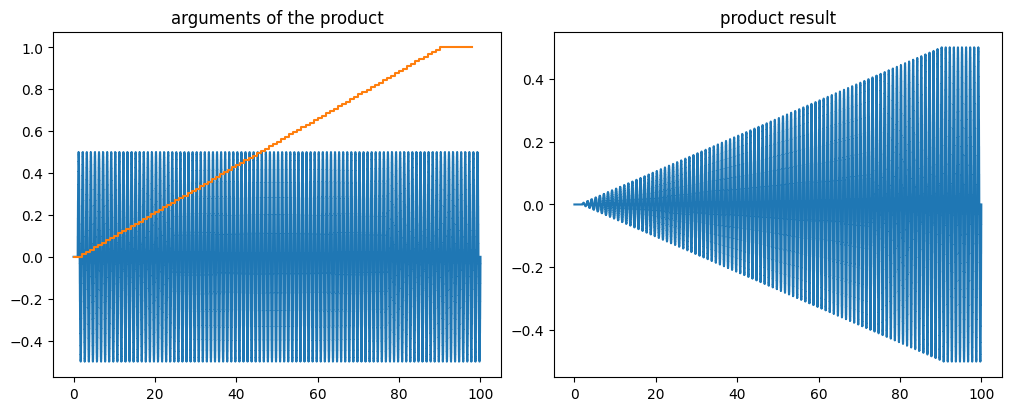

In [10]:
stim1, stim2 = nrv.stimulus(),nrv.stimulus()

f_stim = 1
t_start = 1
duration = 99
amp = 0.5

t_ramp_stop = 90
amp_start = 0
amp_max = 1

stim1.sinus(t_start, duration, amp, f_stim)
stim2.ramp_lim(t_start, t_ramp_stop, amp_start, amp_max, duration, dt=1)

stim3 = stim1*stim2
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 4))

stim1.plot(axs[0])
stim2.plot(axs[0])
axs[0].set_title('arguments of the product')
stim3.plot(axs[1])
axs[1].set_title('product result')




## Low level access

To develop new methods or functions, the user also has access to:
    - an 'append' method, taking as argument a couple of value and time stamp,
    - a 'cacatenate method, taking as argument a couple of list (or iterable, also numpy arrays)', with a optional argument 't_shift' that shifts all fimte stamps with an offset (by default set at zero). This is especially usefull to create repetitive patterns.
